# Classification of Weight Lifting Exercises with PySpark

##### In this tutorial we will demonstrate how to use PySpark for analyzing data, training and evaluating a Machine Learning model for data classification.

##### The Machine Learning model will try to predict how well barbell lift exercises were performed. To accomplish that, we are given a data set with data collected from 6 different individuals. Each individual had accelerometers on the belt, forearm, arm, and dumbbell when performing the exercises, and were asked to perform the exercises several times in 5 different ways. Each of those different ways is a representative of how well the exercise is performed.

<div style="display:block;margin-left:auto;margin-right:auto;width:50%;"/>
<img src="http://groupware.les.inf.puc-rio.br/static/WLE/on-body-sensing-schema.png" alt="on-body sensing schema" height="221" width="371">
</div>


##### The dataset used here is provided from the [Human Activity Recognition Project](http://groupware.les.inf.puc-rio.br/har#weight_lifting_exercises) at PUC Rio.

### Part 1: Loading and examining the dataset

##### Here we use the magic "%sh" to execute shell script commands. We use wget to download the dataset from the blob storage to a local temporary file.

In [5]:
%sh

cd /tmp
wget https://alvilcek.blob.core.windows.net/aitour/wle_dataset.csv -O wle_dataset.csv

--2019-04-17 14:55:57-- https://alvilcek.blob.core.windows.net/aitour/wle_dataset.csv
Resolving alvilcek.blob.core.windows.net (alvilcek.blob.core.windows.net)... 13.68.165.64
Connecting to alvilcek.blob.core.windows.net (alvilcek.blob.core.windows.net)|13.68.165.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16162846 (15M) [application/vnd.ms-excel]
Saving to: ‘wle_dataset.csv’

 0K .......... .......... .......... .......... .......... 0% 119M 0s
 50K .......... .......... .......... .......... .......... 0% 118M 0s
 100K .......... .......... .......... .......... .......... 0% 278M 0s
 150K .......... .......... .......... .......... .......... 1% 166M 0s
 200K .......... .......... .......... .......... .......... 1% 358M 0s
 250K .......... .......... .......... .......... .......... 1% 32.7M 0s
 300K .......... .......... .......... .......... .......... 2% 230M 0s
 350K .......... .......... .......... .......... .......... 2% 245M 0s
 400K .......... .......... .......... .......... .......... 2% 293M 0s
 450K .......... .......... .......... .......... .......... 3% 260M 0s
 500K .......... .......... .......... .......... .......... 3% 15.9M 0s
 550K .......... .......... .......... .......... .......... 3% 246M 0s
 600K .......... .......... .......... .......... .......... 4% 176M 0s
 650K .......... .......... .......... .......... .......... 4% 261M 0s
 700K .......... .......... .......... .......... .......... 4% 285M 0s
 750K .......... .......... .......... .......... .......... 5% 203M 0s
 800K .......... .......... .......... .......... .......... 5% 295M 0s
 850K .......... .......... .......... .......... .......... 5% 292M 0s
 900K .......... .......... .......... .......... .......... 6% 233M 0s
 950K .......... .......... .......... .......... .......... 6% 294M 0s
 1000K .......... .......... .......... .......... .......... 6% 7.77M 0s
 1050K .......... .......... .......... .......... .......... 6% 131M 0s
 1100K .......... .......... .......... .......... .......... 7% 224M 0s
 1150K .......... .......... .......... .......... .......... 7% 246M 0s
 1200K .......... .......... .......... .......... .......... 7% 65.5M 0s
 1250K .......... .......... .......... .......... .......... 8% 83.0M 0s
 1300K .......... .......... .......... .......... .......... 8% 258M 0s
 1350K .......... .......... .......... .......... .......... 8% 287M 0s
 1400K .......... .......... .......... .......... .......... 9% 326M 0s
 1450K .......... .......... .......... .......... .......... 9% 331M 0s
 1500K .......... .......... .......... .......... .......... 9% 197M 0s
 1550K .......... .......... .......... .......... .......... 10% 228M 0s
 1600K .......... .......... .......... .......... .......... 10% 259M 0s
 1650K .......... .......... .......... .......... .......... 10% 319M 0s
 1700K .......... .......... .......... .......... .......... 11% 295M 0s
 1750K .......... .......... .......... .......... .......... 11% 220M 0s
 1800K .......... .......... .......... .......... .......... 11% 302M 0s
 1850K .......... .......... .......... .......... .......... 12% 297M 0s
 1900K .......... .......... .......... .......... .......... 12% 331M 0s
 1950K .......... .......... .......... .......... .......... 12% 281M 0s
 2000K .......... .......... .......... .......... .......... 12% 10.7M 0s
 2050K .......... .......... .......... .......... .......... 13% 91.7M 0s
 2100K .......... .......... .......... .......... .......... 13% 185M 0s
 2150K .......... .......... .......... .......... .......... 13% 183M 0s
 2200K .......... .......... .......... .......... .......... 14% 218M 0s
 2250K .......... .......... .......... .......... .......... 14% 68.5M 0s
 2300K .......... .......... .......... .......... .......... 14% 196M 0s
 2350K .......... .......... .......... .......... .......... 15% 187M 0s
 2400K .......... .......... .......... .......... .......... 15% 76.0M 0s
 2450K

##### We can also use the "%fs" magic to execute commands from dbutils. Here we copy the local dataset to a dbfs location in the tmp folder.

In [7]:
%fs

cp file:/tmp/wle_dataset.csv dbfs:/tmp

res0: Boolean = true

##### Here we read the dataset into an Spark data frame, directly from dbfs. We specify that this data frame has headers and we want Spark to try to infer the column types.

In [9]:
wle_df = sqlContext.read.format("csv").options(header="true", inferSchema="true").load("dbfs:/tmp/wle_dataset.csv")

##### As we are going to execute several Spark operations on this data frame, we cache it into memory first.

In [11]:
wle_df.cache()

Out[ 3 ]: DataFrame[user_name: string, raw_timestamp_part_1: int, raw_timestamp_part_2: int, cvtd_timestamp: string, new_window: string, num_window: int, roll_belt: double, pitch_belt: double, yaw_belt: double, total_accel_belt: int, kurtosis_roll_belt: string, kurtosis_picth_belt: string, kurtosis_yaw_belt: string, skewness_roll_belt13: string, skewness_roll_belt14: string, skewness_yaw_belt: string, max_roll_belt: double, max_picth_belt: double, max_yaw_belt: string, min_roll_belt: double, min_pitch_belt: double, min_yaw_belt: string, amplitude_roll_belt: double, amplitude_pitch_belt: double, amplitude_yaw_belt: string, var_total_accel_belt: double, avg_roll_belt: double, stddev_roll_belt: double, var_roll_belt: double, avg_pitch_belt: double, stddev_pitch_belt: double, var_pitch_belt: double, avg_yaw_belt: double, stddev_yaw_belt: double, var_yaw_belt: double, gyros_belt_x: double, gyros_belt_y: double, gyros_belt_z: double, accel_belt_x: int, accel_belt_y: int, accel_belt_z: int, magnet_belt_x: int, magnet_belt_y: int, magnet_belt_z: int, roll_arm: double, pitch_arm: double, yaw_arm: double, total_accel_arm: int, var_accel_arm: double, avg_roll_arm: double, stddev_roll_arm: double, var_roll_arm: double, avg_pitch_arm: double, stddev_pitch_arm: double, var_pitch_arm: double, avg_yaw_arm: double, stddev_yaw_arm: double, var_yaw_arm: double, gyros_arm_x: double, gyros_arm_y: double, gyros_arm_z: double, accel_arm_x: int, accel_arm_y: int, accel_arm_z: int, magnet_arm_x: int, magnet_arm_y: int, magnet_arm_z: int, kurtosis_roll_arm: string, kurtosis_picth_arm: string, kurtosis_yaw_arm: string, skewness_roll_arm: string, skewness_pitch_arm: string, skewness_yaw_arm: string, max_roll_arm: double, max_picth_arm: double, max_yaw_arm: double, min_roll_arm: double, min_pitch_arm: double, min_yaw_arm: double, amplitude_roll_arm: double, amplitude_pitch_arm: double, amplitude_yaw_arm: double, roll_dumbbell: double, pitch_dumbbell: double, yaw_dumbbell: double, kurtosis_roll_dumbbell: string, kurtosis_picth_dumbbell: string, kurtosis_yaw_dumbbell: string, skewness_roll_dumbbell: string, skewness_pitch_dumbbell: string, skewness_yaw_dumbbell: string, max_roll_dumbbell: double, max_picth_dumbbell: double, max_yaw_dumbbell: string, min_roll_dumbbell: double, min_pitch_dumbbell: double, min_yaw_dumbbell: string, amplitude_roll_dumbbell: double, amplitude_pitch_dumbbell: double, amplitude_yaw_dumbbell: string, total_accel_dumbbell: int, var_accel_dumbbell: double, avg_roll_dumbbell: double, stddev_roll_dumbbell: double, var_roll_dumbbell: double, avg_pitch_dumbbell: double, stddev_pitch_dumbbell: double, var_pitch_dumbbell: double, avg_yaw_dumbbell: double, stddev_yaw_dumbbell: double, var_yaw_dumbbell: double, gyros_dumbbell_x: double, gyros_dumbbell_y: double, gyros_dumbbell_z: double, accel_dumbbell_x: int, accel_dumbbell_y: int, accel_dumbbell_z: int, magnet_dumbbell_x: double, magnet_dumbbell_y: double, magnet_dumbbell_z: double, roll_forearm: double, pitch_forearm: double, yaw_forearm: double, kurtosis_roll_forearm: string, kurtosis_picth_forearm: string, kurtosis_yaw_forearm: string, skewness_roll_forearm: string, skewness_pitch_forearm: string, skewness_yaw_forearm: string, max_roll_forearm: double, max_picth_forearm: double, max_yaw_forearm: string, min_roll_forearm: double, min_pitch_forearm: double, min_yaw_forearm: string, amplitude_roll_forearm: double, amplitude_pitch_forearm: double, amplitude_yaw_forearm: string, total_accel_forearm: int, var_accel_forearm: double, avg_roll_forearm: double, stddev_roll_forearm: double, var_roll_forearm: double, avg_pitch_forearm: double, stddev_pitch_forearm: double, var_pitch_forearm: double, avg_yaw_forearm: double, stddev_yaw_forearm: double, var_yaw_forearm: double, gyros_forearm_x: double, gyros_forearm_y: double, gyros_forearm_z: double, accel_forearm_x: double, accel_forearm_y: double, accel_forearm_z: int, magnet_forearm_x: double, magnet_forearm_y: double, magnet_forearm_z: double, c

##### Here we execute some PySpark commands to inspect the data frame structure, such as its schema and number of rows and columns.

In [13]:
wle_df.printSchema()

root
-- user_name: string (nullable = true)
-- raw_timestamp_part_1: integer (nullable = true)
-- raw_timestamp_part_2: integer (nullable = true)
-- cvtd_timestamp: string (nullable = true)
-- new_window: string (nullable = true)
-- num_window: integer (nullable = true)
-- roll_belt: double (nullable = true)
-- pitch_belt: double (nullable = true)
-- yaw_belt: double (nullable = true)
-- total_accel_belt: integer (nullable = true)
-- kurtosis_roll_belt: string (nullable = true)
-- kurtosis_picth_belt: string (nullable = true)
-- kurtosis_yaw_belt: string (nullable = true)
-- skewness_roll_belt13: string (nullable = true)
-- skewness_roll_belt14: string (nullable = true)
-- skewness_yaw_belt: string (nullable = true)
-- max_roll_belt: double (nullable = true)
-- max_picth_belt: double (nullable = true)
-- max_yaw_belt: string (nullable = true)
-- min_roll_belt: double (nullable = true)
-- min_pitch_belt: double (nullable = true)
-- min_yaw_belt: string (nullable = true)
-- amplitude_roll_belt: double (nullable = true)
-- amplitude_pitch_belt: double (nullable = true)
-- amplitude_yaw_belt: string (nullable = true)
-- var_total_accel_belt: double (nullable = true)
-- avg_roll_belt: double (nullable = true)
-- stddev_roll_belt: double (nullable = true)
-- var_roll_belt: double (nullable = true)
-- avg_pitch_belt: double (nullable = true)
-- stddev_pitch_belt: double (nullable = true)
-- var_pitch_belt: double (nullable = true)
-- avg_yaw_belt: double (nullable = true)
-- stddev_yaw_belt: double (nullable = true)
-- var_yaw_belt: double (nullable = true)
-- gyros_belt_x: double (nullable = true)
-- gyros_belt_y: double (nullable = true)
-- gyros_belt_z: double (nullable = true)
-- accel_belt_x: integer (nullable = true)
-- accel_belt_y: integer (nullable = true)
-- accel_belt_z: integer (nullable = true)
-- magnet_belt_x: integer (nullable = true)
-- magnet_belt_y: integer (nullable = true)
-- magnet_belt_z: integer (nullable = true)
-- roll_arm: double (nullable = true)
-- pitch_arm: double (nullable = true)
-- yaw_arm: double (nullable = true)
-- total_accel_arm: integer (nullable = true)
-- var_accel_arm: double (nullable = true)
-- avg_roll_arm: double (nullable = true)
-- stddev_roll_arm: double (nullable = true)
-- var_roll_arm: double (nullable = true)
-- avg_pitch_arm: double (nullable = true)
-- stddev_pitch_arm: double (nullable = true)
-- var_pitch_arm: double (nullable = true)
-- avg_yaw_arm: double (nullable = true)
-- stddev_yaw_arm: double (nullable = true)
-- var_yaw_arm: double (nullable = true)
-- gyros_arm_x: double (nullable = true)
-- gyros_arm_y: double (nullable = true)
-- gyros_arm_z: double (nullable = true)
-- accel_arm_x: integer (nullable = true)
-- accel_arm_y: integer (nullable = true)
-- accel_arm_z: integer (nullable = true)
-- magnet_arm_x: integer (nullable = true)
-- magnet_arm_y: integer (nullable = true)
-- magnet_arm_z: integer (nullable = true)
-- kurtosis_roll_arm: string (nullable = true)
-- kurtosis_picth_arm: string (nullable = true)
-- kurtosis_yaw_arm: string (nullable = true)
-- skewness_roll_arm: string (nullable = true)
-- skewness_pitch_arm: string (nullable = true)
-- skewness_yaw_arm: string (nullable = true)
-- max_roll_arm: double (nullable = true)
-- max_picth_arm: double (nullable = true)
-- max_yaw_arm: double (nullable = true)
-- min_roll_arm: double (nullable = true)
-- min_pitch_arm: double (nullable = true)
-- min_yaw_arm: double (nullable = true)
-- amplitude_roll_arm: double (nullable = true)
-- amplitude_pitch_arm: double (nullable = true)
-- amplitude_yaw_arm: double (nullable = true)
-- roll_dumbbell: double (nullable = true)
-- pitch_dumbbell: double (nullable = true)
-- yaw_dumbbell: double (nullable = true)
-- kurtosis_roll_dumbbell: string (nullable = true)
-- kurtosis_picth_dumbbell: string (nullable = true)
-- kurtosis_yaw_dumbbell: string (nullable = true)
-- skewness_roll_dumbbell: string (nullable = true)
-- skewness_pitch_dumbbell: string (nullable = true)


In [14]:
wle_df.count()

Out[ 5 ]: 39242

In [15]:
len(wle_df.columns)

Out[ 6 ]: 159

##### Databricks has a very useful command called "display", that operates on Spark data frames.

##### It allows for interactive visualizations of the dataset in both tabular and graphical ways.

##### Here we plot the distribution of the column "classe". It has five distinct values. According to the [dataset documentation](http://groupware.les.inf.puc-rio.br/har#weight_lifting_exercises), the label "A" corresponds to an exercise that was performed correctly. The other labels "B", "C", "D", and "E", correspond to common mistakes when the exercise was performed.

In [17]:
display(wle_df)

user_name raw_timestamp_part_1 raw_timestamp_part_2 cvtd_timestamp new_window num_window roll_belt pitch_belt yaw_belt total_accel_belt kurtosis_roll_belt kurtosis_picth_belt kurtosis_yaw_belt skewness_roll_belt13 skewness_roll_belt14 skewness_yaw_belt max_roll_belt max_picth_belt max_yaw_belt min_roll_belt min_pitch_belt min_yaw_belt amplitude_roll_belt amplitude_pitch_belt amplitude_yaw_belt var_total_accel_belt avg_roll_belt stddev_roll_belt var_roll_belt avg_pitch_belt stddev_pitch_belt var_pitch_belt avg_yaw_belt stddev_yaw_belt var_yaw_belt gyros_belt_x gyros_belt_y gyros_belt_z accel_belt_x accel_belt_y accel_belt_z magnet_belt_x magnet_belt_y magnet_belt_z roll_arm pitch_arm yaw_arm total_accel_arm var_accel_arm avg_roll_arm stddev_roll_arm var_roll_arm avg_pitch_arm stddev_pitch_arm var_pitch_arm avg_yaw_arm stddev_yaw_arm var_yaw_arm gyros_arm_x gyros_arm_y gyros_arm_z accel_arm_x accel_arm_y accel_arm_z magnet_arm_x magnet_arm_y magnet_arm_z kurtosis_roll_arm kurtosis_picth_arm kurtosis_yaw_arm skewness_roll_arm skewness_pitch_arm skewness_yaw_arm max_roll_arm max_picth_arm max_yaw_arm min_roll_arm min_pitch_arm min_yaw_arm amplitude_roll_arm amplitude_pitch_arm amplitude_yaw_arm roll_dumbbell pitch_dumbbell yaw_dumbbell kurtosis_roll_dumbbell kurtosis_picth_dumbbell kurtosis_yaw_dumbbell skewness_roll_dumbbell skewness_pitch_dumbbell skewness_yaw_dumbbell max_roll_dumbbell max_picth_dumbbell max_yaw_dumbbell min_roll_dumbbell min_pitch_dumbbell min_yaw_dumbbell amplitude_roll_dumbbell amplitude_pitch_dumbbell amplitude_yaw_dumbbell total_accel_dumbbell var_accel_dumbbell avg_roll_dumbbell stddev_roll_dumbbell var_roll_dumbbell avg_pitch_dumbbell stddev_pitch_dumbbell var_pitch_dumbbell avg_yaw_dumbbell stddev_yaw_dumbbell var_yaw_dumbbell gyros_dumbbell_x gyros_dumbbell_y gyros_dumbbell_z accel_dumbbell_x accel_dumbbell_y accel_dumbbell_z magnet_dumbbell_x magnet_dumbbell_y magnet_dumbbell_z roll_forearm pitch_forearm yaw_forearm kurtosis_roll_forearm kurtosis_picth_forearm kurtosis_yaw_forearm skewness_roll_forearm skewness_pitch_forearm skewness_yaw_forearm max_roll_forearm max_picth_forearm max_yaw_forearm min_roll_forearm min_pitch_forearm min_yaw_forearm amplitude_roll_forearm amplitude_pitch_forearm amplitude_yaw_forearm total_accel_forearm var_accel_forearm avg_roll_forearm stddev_roll_forearm var_roll_forearm avg_pitch_forearm stddev_pitch_forearm var_pitch_forearm avg_yaw_forearm stddev_yaw_forearm var_yaw_forearm gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x accel_forearm_y accel_forearm_z magnet_forearm_x magnet_forearm_y magnet_forearm_z classe eurico 1322489729 34670 28/11/2011 14:15 no 1 3.7 41.6 -82.8 3 null null null null null null null null null null null null null null null null null null null null null null null null null 2.02 0.18 0.02 -3 -18 22 387 525 -267 132.0 -43.7 -53.6 38 null null null null null null null null null null 2.65 -0.61 -0.02 143 30 -346 556 -205 -374 null null null null null null null null null null null null null null null 51.23553997 11.69884724 104.2647274 null null null null null null null null null null null null null null null 4 null null null null null null null null null null -0.31 0.16 0.08 5 21 37 -471.0 191.0 277.0 -111.0 26.5 138.0 null null null null null null null null null null null null null null null 30 null null null null null null null null null null -0.05 -0.37 -0.43 -170.0 155.0 184 -1160.0 1400.0 -876.0 E eurico 1322489729 62641 28/11/2011 14:15 no 1 3.66 42.8 -82.5 2 null null null null null null null null null null null null null null null null null null null null null null null null null 1.96 0.14 0.05 -2 -13 16 405 512 -254 129.0 -45.3 -49.0 38 null null null null null null null null null null 2.79 -0.64 -0.11 146 35 -339 599 -206 -335 null null null null null null null null null null null null null null null 55.82441814 9.645819033 100.2280531 null null null null null null null null null null null null null null null 4 null null nu

##### Here we are only interested in the columns representing the numerical measurements from the sensors, plus the "classe" column. Therefore we remove columns representing metadata, which correspond to the first six columns in the data frame. We can do the data frame subsetting in several ways. Here we use the "select" function.

In [19]:
columns_to_keep = wle_df.columns[6:]
wle_df = wle_df.select(columns_to_keep)

In [20]:
len(wle_df.columns)

Out[ 9 ]: 153

##### We also need to correct some data types. There are several columns with missing values, which Spark represent as a "NULL". These columns are numeric, but as they have empty values in the original CSV file they were inferred as strings.

##### We then cast all columns to numeric, except the "classe" column. In this way, we force all missing values to be correctly interpreted. Notice that we need to use the Spark data types. In our case, this is the type "double" in a Spark data frame.

##### To perform that, we loop over the columns of interest (all columns but the last one) and execute the PySpark "withColumn" and "cast" functions, to replace the column by casting it to the correct data type.

In [22]:
for col, type in wle_df.dtypes[:-1]:
  if type == "string":
    wle_df = wle_df.withColumn(col, wle_df[col].cast("double"))

In [23]:
wle_df.printSchema()

root
-- roll_belt: double (nullable = true)
-- pitch_belt: double (nullable = true)
-- yaw_belt: double (nullable = true)
-- total_accel_belt: integer (nullable = true)
-- kurtosis_roll_belt: double (nullable = true)
-- kurtosis_picth_belt: double (nullable = true)
-- kurtosis_yaw_belt: double (nullable = true)
-- skewness_roll_belt13: double (nullable = true)
-- skewness_roll_belt14: double (nullable = true)
-- skewness_yaw_belt: double (nullable = true)
-- max_roll_belt: double (nullable = true)
-- max_picth_belt: double (nullable = true)
-- max_yaw_belt: double (nullable = true)
-- min_roll_belt: double (nullable = true)
-- min_pitch_belt: double (nullable = true)
-- min_yaw_belt: double (nullable = true)
-- amplitude_roll_belt: double (nullable = true)
-- amplitude_pitch_belt: double (nullable = true)
-- amplitude_yaw_belt: double (nullable = true)
-- var_total_accel_belt: double (nullable = true)
-- avg_roll_belt: double (nullable = true)
-- stddev_roll_belt: double (nullable = true)
-- var_roll_belt: double (nullable = true)
-- avg_pitch_belt: double (nullable = true)
-- stddev_pitch_belt: double (nullable = true)
-- var_pitch_belt: double (nullable = true)
-- avg_yaw_belt: double (nullable = true)
-- stddev_yaw_belt: double (nullable = true)
-- var_yaw_belt: double (nullable = true)
-- gyros_belt_x: double (nullable = true)
-- gyros_belt_y: double (nullable = true)
-- gyros_belt_z: double (nullable = true)
-- accel_belt_x: integer (nullable = true)
-- accel_belt_y: integer (nullable = true)
-- accel_belt_z: integer (nullable = true)
-- magnet_belt_x: integer (nullable = true)
-- magnet_belt_y: integer (nullable = true)
-- magnet_belt_z: integer (nullable = true)
-- roll_arm: double (nullable = true)
-- pitch_arm: double (nullable = true)
-- yaw_arm: double (nullable = true)
-- total_accel_arm: integer (nullable = true)
-- var_accel_arm: double (nullable = true)
-- avg_roll_arm: double (nullable = true)
-- stddev_roll_arm: double (nullable = true)
-- var_roll_arm: double (nullable = true)
-- avg_pitch_arm: double (nullable = true)
-- stddev_pitch_arm: double (nullable = true)
-- var_pitch_arm: double (nullable = true)
-- avg_yaw_arm: double (nullable = true)
-- stddev_yaw_arm: double (nullable = true)
-- var_yaw_arm: double (nullable = true)
-- gyros_arm_x: double (nullable = true)
-- gyros_arm_y: double (nullable = true)
-- gyros_arm_z: double (nullable = true)
-- accel_arm_x: integer (nullable = true)
-- accel_arm_y: integer (nullable = true)
-- accel_arm_z: integer (nullable = true)
-- magnet_arm_x: integer (nullable = true)
-- magnet_arm_y: integer (nullable = true)
-- magnet_arm_z: integer (nullable = true)
-- kurtosis_roll_arm: double (nullable = true)
-- kurtosis_picth_arm: double (nullable = true)
-- kurtosis_yaw_arm: double (nullable = true)
-- skewness_roll_arm: double (nullable = true)
-- skewness_pitch_arm: double (nullable = true)
-- skewness_yaw_arm: double (nullable = true)
-- max_roll_arm: double (nullable = true)
-- max_picth_arm: double (nullable = true)
-- max_yaw_arm: double (nullable = true)
-- min_roll_arm: double (nullable = true)
-- min_pitch_arm: double (nullable = true)
-- min_yaw_arm: double (nullable = true)
-- amplitude_roll_arm: double (nullable = true)
-- amplitude_pitch_arm: double (nullable = true)
-- amplitude_yaw_arm: double (nullable = true)
-- roll_dumbbell: double (nullable = true)
-- pitch_dumbbell: double (nullable = true)
-- yaw_dumbbell: double (nullable = true)
-- kurtosis_roll_dumbbell: double (nullable = true)
-- kurtosis_picth_dumbbell: double (nullable = true)
-- kurtosis_yaw_dumbbell: double (nullable = true)
-- skewness_roll_dumbbell: double (nullable = true)
-- skewness_pitch_dumbbell: double (nullable = true)
-- skewness_yaw_dumbbell: double (nullable = true)
-- max_roll_dumbbell: double (nullable = true)
-- max_picth_dumbbell: double (nullable = true)
-- max_yaw_dumbbell: double (nullable = true)
-- min_roll_dumbbell: double (nullable = true)
-- min_pitch_dumbbell: doub

In [24]:
len(wle_df.columns)

Out[ 12 ]: 153

##### Now we need to analyze those missing values and decide what to do with them. To perform this analysis, first we need to count the number of missing values for each column.

##### For this, we will iterate over all columns and use the functions "sum" and "col", returning a Pandas data frame containing the counts of missing values for all columns.

In [26]:
from pyspark.sql.functions import col,sum
import pandas as pd

n_cols = len(wle_df.columns)
missing_counts = wle_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in wle_df.columns)).toPandas()
missing_counts = pd.DataFrame({"features": wle_df.columns, "missing_counts": missing_counts.T.values.reshape(n_cols)})

##### We can then visualize the distribution of missing values across the columns.

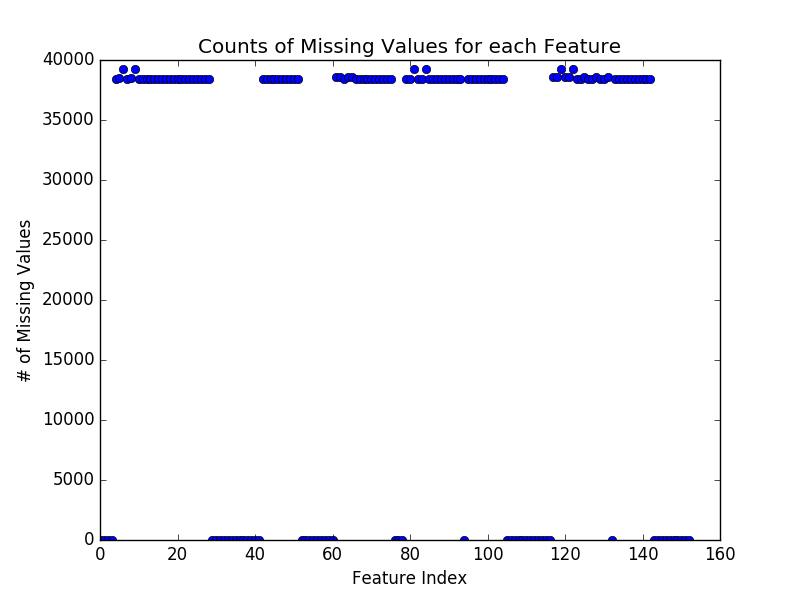

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(missing_counts["missing_counts"], "o")
ax.set_title("Counts of Missing Values for each Feature")
ax.set_xlabel("Feature Index")
ax.set_ylabel("# of Missing Values")
display(fig)

##### We can see that there are only two patterns here: either a given column has no missing values (or very few), or it has all records (or almost all) with missing values.

##### We then keep only the columns with very few or no missing values, corresponding to 52 numeric columns plus the "classe" column.

In [30]:
missing_counts = missing_counts[missing_counts["missing_counts"] < 1000]

cols_to_keep = missing_counts["features"].values.tolist()
cols_to_keep

Out[ 15 ]: 
['roll_belt',
 'pitch_belt',
 'yaw_belt',
 'total_accel_belt',
 'gyros_belt_x',
 'gyros_belt_y',
 'gyros_belt_z',
 'accel_belt_x',
 'accel_belt_y',
 'accel_belt_z',
 'magnet_belt_x',
 'magnet_belt_y',
 'magnet_belt_z',
 'roll_arm',
 'pitch_arm',
 'yaw_arm',
 'total_accel_arm',
 'gyros_arm_x',
 'gyros_arm_y',
 'gyros_arm_z',
 'accel_arm_x',
 'accel_arm_y',
 'accel_arm_z',
 'magnet_arm_x',
 'magnet_arm_y',
 'magnet_arm_z',
 'roll_dumbbell',
 'pitch_dumbbell',
 'yaw_dumbbell',
 'total_accel_dumbbell',
 'gyros_dumbbell_x',
 'gyros_dumbbell_y',
 'gyros_dumbbell_z',
 'accel_dumbbell_x',
 'accel_dumbbell_y',
 'accel_dumbbell_z',
 'magnet_dumbbell_x',
 'magnet_dumbbell_y',
 'magnet_dumbbell_z',
 'roll_forearm',
 'pitch_forearm',
 'yaw_forearm',
 'total_accel_forearm',
 'gyros_forearm_x',
 'gyros_forearm_y',
 'gyros_forearm_z',
 'accel_forearm_x',
 'accel_forearm_y',
 'accel_forearm_z',
 'magnet_forearm_x',
 'magnet_forearm_y',
 'magnet_forearm_z',
 'classe']

In [31]:
wle_df = wle_df[cols_to_keep]

len(wle_df.columns)

Out[ 16 ]: 53

##### In case there are still columns with very few missing values, we remove the corresponding rows. We use the PySpark "dropna" function.

In [33]:
print(wle_df.count())

wle_df = wle_df.dropna(how="any")

39242

##### It turned out that there was only one row with one or more missing values.

##### Now our dataset is ready to the next analysis.

In [35]:
wle_df.count()

Out[ 18 ]: 39241

### Part 2: Training a classifier model

##### We begin by analyzing the distributions of the sensor measurements in order to see if they differ across the different values of the target variable "classe". The idea here is not to perform a formal statistical analysis, but only to try to quickly find potential visual evidences of that.

##### Databricks helps a lot here, because we can use its "display" function over our data frame and navigate through several visualizations interactively.

In [38]:
display(wle_df)

roll_belt pitch_belt yaw_belt total_accel_belt gyros_belt_x gyros_belt_y gyros_belt_z accel_belt_x accel_belt_y accel_belt_z magnet_belt_x magnet_belt_y magnet_belt_z roll_arm pitch_arm yaw_arm total_accel_arm gyros_arm_x gyros_arm_y gyros_arm_z accel_arm_x accel_arm_y accel_arm_z magnet_arm_x magnet_arm_y magnet_arm_z roll_dumbbell pitch_dumbbell yaw_dumbbell total_accel_dumbbell gyros_dumbbell_x gyros_dumbbell_y gyros_dumbbell_z accel_dumbbell_x accel_dumbbell_y accel_dumbbell_z magnet_dumbbell_x magnet_dumbbell_y magnet_dumbbell_z roll_forearm pitch_forearm yaw_forearm total_accel_forearm gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x accel_forearm_y accel_forearm_z magnet_forearm_x magnet_forearm_y magnet_forearm_z classe 3.7 41.6 -82.8 3 2.02 0.18 0.02 -3 -18 22 387 525 -267 132.0 -43.7 -53.6 38 2.65 -0.61 -0.02 143 30 -346 556 -205 -374 51.23553997 11.69884724 104.2647274 4 -0.31 0.16 0.08 5 21 37 -471.0 191.0 277.0 -111.0 26.5 138.0 30 -0.05 -0.37 -0.43 -170.0 155.0 184 -1160.0 1400.0 -876.0 E 3.66 42.8 -82.5 2 1.96 0.14 0.05 -2 -13 16 405 512 -254 129.0 -45.3 -49.0 38 2.79 -0.64 -0.11 146 35 -339 599 -206 -335 55.82441814 9.645819033 100.2280531 4 -0.31 0.14 0.07 4 22 35 -472.0 184.0 281.0 -112.0 26.2 138.0 31 -0.06 -0.37 -0.59 -178.0 164.0 182 -1150.0 1410.0 -871.0 E 3.58 43.7 -82.3 1 1.88 0.08 0.05 -2 -6 8 409 511 -244 125.0 -46.8 -43.7 35 2.91 -0.69 -0.15 156 44 -307 613 -198 -319 55.4698307 6.875243852 101.0841063 4 -0.31 0.16 0.05 3 23 37 -468.0 190.0 275.0 -114.0 26.0 137.0 32 -0.05 -0.27 -0.72 -182.0 172.0 185 -1130.0 1400.0 -863.0 E 3.56 44.4 -82.1 1 1.8 0.03 0.08 -6 -5 7 422 513 -221 120.0 -48.1 -38.1 35 3.08 -0.72 -0.23 158 52 -305 646 -186 -268 55.94485974 11.07929719 99.78455638 5 -0.31 0.16 0.07 5 24 38 -469.0 184.0 285.0 -115.0 25.8 137.0 33 0.02 -0.24 -0.79 -185.0 182.0 188 -1120.0 1400.0 -855.0 E 3.57 45.1 -81.9 1 1.77 0.0 0.13 -4 -9 0 418 508 -208 115.0 -49.1 -31.7 34 3.2 -0.77 -0.25 163 55 -288 670 -175 -241 55.21173932 11.42683324 100.4225829 4 -0.31 0.14 0.07 5 23 37 -468.0 189.0 292.0 -117.0 25.5 137.0 34 0.08 -0.27 -0.82 -188.0 195.0 188 -1100.0 1400.0 -843.0 E 3.45 45.6 -81.9 1 1.75 -0.03 0.16 1 -9 -5 432 510 -189 110.0 -49.6 -25.8 33 3.31 -0.83 -0.3 160 59 -274 696 -174 -193 54.24730572 14.1266364 100.6157378 4 -0.31 0.14 0.07 6 22 36 -473.0 188.0 278.0 -118.0 25.1 137.0 36 0.14 -0.29 -0.82 -208.0 207.0 190 -1090.0 1400.0 -838.0 E 3.31 46.2 -81.9 3 1.78 -0.06 0.15 1 -24 -8 438 508 -176 104.0 -49.9 -18.5 29 3.5 -0.83 -0.31 165 67 -225 721 -161 -121 55.4659041 14.41312778 99.33471192 4 -0.29 0.14 0.07 6 22 35 -471.0 183.0 284.0 -120.0 24.8 136.0 37 0.21 -0.24 -0.84 -215.0 214.0 190 -1060.0 1410.0 -831.0 E 2.91 46.9 -82.2 4 1.75 -0.06 0.23 2 -36 -9 440 503 -163 98.6 -49.7 -11.4 28 3.53 -0.83 -0.21 153 70 -218 725 -152 -105 57.97016269 7.150975658 98.5538415 4 -0.29 0.14 0.07 3 23 35 -476.0 184.0 283.0 -122.0 24.5 135.0 37 0.27 -0.18 -0.85 -212.0 221.0 190 -1060.0 1410.0 -829.0 E 2.31 47.4 -82.6 2 1.65 -0.03 0.33 -1 -19 -7 443 507 -140 93.2 -49.0 -4.49 27 3.4 -0.83 -0.11 143 78 -205 740 -133 -43 54.24730572 14.1266364 100.6157378 4 -0.29 0.14 0.08 6 22 36 -474.0 186.0 278.0 -124.0 24.0 135.0 38 0.37 -0.21 -0.87 -221.0 223.0 194 -1040.0 1400.0 -819.0 E 2.0 47.7 -82.8 3 1.48 -0.06 0.21 -18 18 1 449 499 -132 88.5 -48.1 1.82 22 3.48 -0.8 -0.15 135 96 -134 741 -115 14 54.85229352 12.447054 100.5100485 4 -0.29 0.14 0.07 5 21 34 -470.0 188.0 283.0 -126.0 23.4 134.0 39 0.43 -0.26 -0.89 -220.0 239.0 196 -1020.0 1410.0 -804.0 E 2.41 47.8 -82.3 2 1.3 -0.08 0.1 -13 5 12 452 500 -115 83.7 -47.0 7.99 19 3.58 -0.72 -0.16 127 96 -99 735 -110 64 58.27762755 12.54066481 97.11160622 4 -0.31 0.14 0.07 5 22 33 -475.0 193.0 280.0 -127.0 22.5 133.0 42 0.48 -0.55 -0.87 -233.0 268.0 204 -1020.0 1410.0 -792.0 E 2.49 47.8 -82.1 2 1.14 -0.06 0.08 -5 -7 12 450 498 -112 79.0 -45.6 14.2 18 3.5 -0.67 -0.07 94 106 -109 726 -97 110 55.82441814 9.645819033 100.2280531 4 -0.29 0.16 0.05 4 22 35 -471.0 188.0 291.0 -129

##### Now we will split our data frame into train and test sets.

##### Here we use the PySpark function "randomSplit", to randomly sample 80% of the rows of our data frame for model training, and assign the remaining 20% for model testing.

In [40]:
wle_df_train, wle_df_test = wle_df.randomSplit([0.8, 0.2])

In [41]:
wle_df_test.count()

Out[ 21 ]: 7794

##### As we did before when preparing the data, we cache the data frames to speed further processing up.

In [43]:
wle_df_train.cache()
wle_df_test.cache()

Out[ 22 ]: DataFrame[roll_belt: double, pitch_belt: double, yaw_belt: double, total_accel_belt: int, gyros_belt_x: double, gyros_belt_y: double, gyros_belt_z: double, accel_belt_x: int, accel_belt_y: int, accel_belt_z: int, magnet_belt_x: int, magnet_belt_y: int, magnet_belt_z: int, roll_arm: double, pitch_arm: double, yaw_arm: double, total_accel_arm: int, gyros_arm_x: double, gyros_arm_y: double, gyros_arm_z: double, accel_arm_x: int, accel_arm_y: int, accel_arm_z: int, magnet_arm_x: int, magnet_arm_y: int, magnet_arm_z: int, roll_dumbbell: double, pitch_dumbbell: double, yaw_dumbbell: double, total_accel_dumbbell: int, gyros_dumbbell_x: double, gyros_dumbbell_y: double, gyros_dumbbell_z: double, accel_dumbbell_x: int, accel_dumbbell_y: int, accel_dumbbell_z: int, magnet_dumbbell_x: double, magnet_dumbbell_y: double, magnet_dumbbell_z: double, roll_forearm: double, pitch_forearm: double, yaw_forearm: double, total_accel_forearm: int, gyros_forearm_x: double, gyros_forearm_y: double, gyros_forearm_z: double, accel_forearm_x: double, accel_forearm_y: double, accel_forearm_z: int, magnet_forearm_x: double, magnet_forearm_y: double, magnet_forearm_z: double, classe: string]

##### With the help of Databrick's "display" function, we can easily inspect if the distributions of the target variable "classe" were preserved in both the training and testing data frames.

In [45]:
display(wle_df_train)

roll_belt pitch_belt yaw_belt total_accel_belt gyros_belt_x gyros_belt_y gyros_belt_z accel_belt_x accel_belt_y accel_belt_z magnet_belt_x magnet_belt_y magnet_belt_z roll_arm pitch_arm yaw_arm total_accel_arm gyros_arm_x gyros_arm_y gyros_arm_z accel_arm_x accel_arm_y accel_arm_z magnet_arm_x magnet_arm_y magnet_arm_z roll_dumbbell pitch_dumbbell yaw_dumbbell total_accel_dumbbell gyros_dumbbell_x gyros_dumbbell_y gyros_dumbbell_z accel_dumbbell_x accel_dumbbell_y accel_dumbbell_z magnet_dumbbell_x magnet_dumbbell_y magnet_dumbbell_z roll_forearm pitch_forearm yaw_forearm total_accel_forearm gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x accel_forearm_y accel_forearm_z magnet_forearm_x magnet_forearm_y magnet_forearm_z classe -28.9 60.1 -96.2 10 0.11 0.0 -0.03 -82 1 54 152 497 293 132.0 51.0 90.3 39 -0.71 -0.75 2.12 -274 150 -214 -467 461 144 16.58764049 31.71786971 121.0129458 6 -0.18 0.29 0.08 17 9 51 -471.0 203.0 281.0 -178.0 -19.0 131.0 35 -0.48 -0.88 0.44 -216.0 170.0 206 -762.0 1030.0 -297.0 E -28.9 60.2 -96.1 10 0.08 0.0 0.0 -78 -4 52 154 499 286 134.0 52.3 90.5 39 -0.66 -0.69 1.99 -274 146 -218 -480 462 132 3.820339138 45.47437717 111.4206736 5 -0.11 0.31 0.15 23 2 47 -472.0 201.0 280.0 -178.0 -18.6 132.0 35 -0.53 -0.79 0.44 -227.0 161.0 208 -773.0 1040.0 -307.0 E -28.9 60.2 -95.9 9 0.05 0.02 0.0 -77 -4 51 152 507 288 136.0 53.4 90.7 39 -0.59 -0.63 1.84 -277 145 -225 -489 455 118 -23.31317585 45.87182602 104.7839765 5 -0.11 0.37 0.2 23 -12 45 -471.0 214.0 278.0 -178.0 -18.2 133.0 36 -0.51 -0.71 0.41 -224.0 164.0 213 -781.0 1040.0 -301.0 E -28.8 60.0 -96.3 10 0.13 0.0 -0.03 -79 6 54 150 492 284 129.0 49.7 90.2 38 -0.71 -0.82 2.18 -271 153 -211 -459 464 165 17.93898445 7.143242994 137.7419189 6 -0.24 0.31 0.07 4 10 55 -463.0 200.0 275.0 -178.0 -19.4 130.0 35 -0.45 -0.82 0.33 -211.0 175.0 211 -761.0 1030.0 -287.0 E -28.8 60.2 -95.6 10 0.02 0.02 0.02 -79 -5 52 156 498 280 138.0 54.4 91.0 39 -0.55 -0.56 1.66 -277 137 -221 -490 459 92 -41.32738085 24.33608496 108.3370191 5 -0.18 0.4 0.16 12 -20 44 -466.0 209.0 268.0 -179.0 -17.9 134.0 36 -0.42 -0.72 0.38 -231.0 163.0 218 -785.0 1040.0 -302.0 E -28.7 59.9 -96.4 10 0.16 -0.02 -0.02 -78 5 53 152 500 285 126.0 48.3 90.1 39 -0.69 -0.88 2.28 -271 157 -211 -454 464 170 20.83156179 -3.761108989 135.9013919 5 -0.26 0.29 0.08 -2 11 52 -473.0 201.0 290.0 -178.0 -19.7 130.0 36 -0.45 -0.75 0.07 -215.0 181.0 214 -755.0 1040.0 -292.0 E -28.6 59.8 -96.4 10 0.18 -0.03 0.0 -77 -1 53 152 495 287 124.0 46.9 90.0 38 -0.69 -0.93 2.4 -264 157 -204 -441 466 193 29.51779121 -4.15705538 127.2529971 5 -0.27 0.27 0.1 -2 14 46 -468.0 201.0 278.0 -177.0 -20.0 129.0 35 -0.42 -0.64 -0.28 -201.0 178.0 212 -756.0 1050.0 -304.0 E -28.6 60.1 -95.3 10 -0.02 0.03 0.02 -80 -7 52 149 503 286 140.0 55.4 91.2 38 -0.53 -0.51 1.56 -277 130 -220 -496 453 83 -41.82243296 0.0 115.2571997 5 -0.24 0.4 0.05 0 -20 45 -467.0 215.0 268.0 -179.0 -17.8 134.0 36 -0.32 -0.67 0.34 -231.0 158.0 217 -788.0 1040.0 -307.0 E -28.4 59.7 -96.4 10 0.21 -0.05 0.0 -80 -10 55 157 504 276 121.0 45.3 90.0 37 -0.69 -0.98 2.49 -259 162 -200 -435 470 201 40.75375419 2.086202641 116.266119 5 -0.29 0.24 0.1 1 19 44 -468.0 198.0 291.0 -176.0 -20.2 128.0 32 -0.31 -0.39 -0.52 -178.0 166.0 204 -775.0 1070.0 -322.0 E -28.4 60.1 -95.0 10 -0.03 0.03 0.02 -77 -8 54 155 507 282 142.0 56.1 91.4 38 -0.47 -0.42 1.39 -277 126 -219 -504 440 68 -8.655538056 -21.78371162 133.5874871 5 -0.31 0.4 -0.08 -10 -4 45 -467.0 213.0 267.0 -179.0 -17.7 135.0 35 -0.24 -0.58 0.26 -225.0 147.0 215 -785.0 1040.0 -299.0 E -28.2 60.0 -94.7 9 -0.05 0.03 0.03 -73 -8 53 151 495 283 144.0 56.7 91.7 39 -0.35 -0.31 1.15 -281 128 -221 -505 443 67 28.16941913 -28.16941913 116.6765307 5 -0.34 0.4 -0.2 -13 13 43 -469.0 217.0 274.0 -179.0 -17.7 135.0 34 -0.19 -0.48 0.15 -218.0 140.0 213 -790.0 1030.0 -296.0 E -28.1 60.3 -92.7 8 0.1 -0.03 -0.02 -66 -1 48 144 508 276 138.0 55.7 90.9 38 0.02 -0.05 0.03 -277 127 -215 -492 459 105 60.02212689 57.25426907 67.18823248 9 0.14 0.13 -1

In [46]:
display(wle_df_test)

roll_belt pitch_belt yaw_belt total_accel_belt gyros_belt_x gyros_belt_y gyros_belt_z accel_belt_x accel_belt_y accel_belt_z magnet_belt_x magnet_belt_y magnet_belt_z roll_arm pitch_arm yaw_arm total_accel_arm gyros_arm_x gyros_arm_y gyros_arm_z accel_arm_x accel_arm_y accel_arm_z magnet_arm_x magnet_arm_y magnet_arm_z roll_dumbbell pitch_dumbbell yaw_dumbbell total_accel_dumbbell gyros_dumbbell_x gyros_dumbbell_y gyros_dumbbell_z accel_dumbbell_x accel_dumbbell_y accel_dumbbell_z magnet_dumbbell_x magnet_dumbbell_y magnet_dumbbell_z roll_forearm pitch_forearm yaw_forearm total_accel_forearm gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x accel_forearm_y accel_forearm_z magnet_forearm_x magnet_forearm_y magnet_forearm_z classe -28.2 59.5 -96.3 10 0.22 -0.08 -0.03 -84 -13 56 164 498 291 118.0 43.8 90.0 37 -0.71 -0.98 2.59 -250 169 -193 -426 474 226 39.64412832 0.0 117.4355044 5 -0.31 0.26 0.07 0 18 43 -469.0 193.0 284.0 -175.0 -20.4 128.0 31 -0.06 -0.24 -0.56 -176.0 151.0 195 -778.0 1090.0 -331.0 E -27.9 59.4 -96.1 10 0.26 -0.1 -0.05 -83 -8 59 164 498 277 115.0 42.2 90.1 36 -0.75 -1.0 2.69 -246 168 -186 -415 478 265 38.83187182 0.0 118.2477609 5 -0.31 0.24 0.07 0 18 44 -471.0 196.0 276.0 -174.0 -20.2 128.0 31 0.31 -0.51 -0.39 -191.0 145.0 189 -809.0 1110.0 -359.0 E -27.5 59.2 -95.9 10 0.29 -0.11 -0.05 -76 -8 57 168 495 273 112.0 40.6 90.4 36 -0.83 -1.06 2.81 -251 172 -187 -410 466 268 38.92013381 2.37178239 118.0794619 4 -0.32 0.22 0.08 1 16 39 -470.0 195.0 291.0 -173.0 -19.5 127.0 33 0.61 -0.85 -0.21 -188.0 160.0 205 -808.0 1130.0 -375.0 E -25.3 58.2 -94.6 9 0.47 -0.16 -0.16 -70 -7 47 183 495 273 98.8 33.6 92.5 34 -0.69 -1.12 2.84 -239 172 -149 -383 441 384 54.58234813 9.452654275 101.4984779 4 -0.31 0.21 0.07 4 22 36 -477.0 193.0 287.0 -169.0 -14.0 125.0 31 0.75 -0.13 -0.89 -153.0 149.0 216 -782.0 1120.0 -367.0 E -24.0 57.9 -93.9 8 0.53 -0.31 -0.23 -62 -7 42 195 490 259 93.1 30.6 93.6 33 -0.48 -1.09 2.46 -238 170 -135 -367 418 437 48.3093971 9.795051006 107.6168865 4 -0.29 0.18 0.05 4 19 36 -471.0 191.0 291.0 -166.0 -11.9 126.0 33 0.55 0.4 -1.3 -190.0 160.0 203 -804.0 1150.0 -395.0 E -20.3 57.8 -91.1 9 0.63 -0.45 -0.33 -73 5 43 237 495 240 83.4 25.4 94.4 31 0.03 -0.85 1.51 -227 181 -102 -344 382 517 51.3740352 9.374452014 104.6881426 4 -0.29 0.18 0.05 4 21 37 -473.0 179.0 295.0 -159.0 -6.62 126.0 41 0.67 -1.16 -0.85 -226.0 240.0 232 -834.0 1230.0 -474.0 E -15.4 57.2 -88.2 5 0.66 -0.35 -0.31 -22 32 37 286 501 204 73.8 19.4 90.3 30 1.3 -0.9 1.35 -223 188 -61 -266 315 580 54.43080586 11.79611664 101.0978897 4 -0.31 0.16 0.05 5 22 36 -471.0 188.0 277.0 -150.0 -0.85 123.0 35 0.24 -0.69 -1.02 -179.0 209.0 205 -875.0 1330.0 -577.0 E -13.4 2.55 -93.1 8 0.03 0.0 -0.07 -16 -11 75 -21 644 -175 81.0 -17.3 61.4 23 3.68 -1.88 0.82 -139 175 5 369 216 495 91.59485046 32.86755798 54.27160349 11 0.05 -1.11 0.57 35 86 56 -376.0 457.0 74.0 -153.0 37.4 -91.9 30 0.0 -2.47 -1.03 -45.0 -197.0 -213 -81.0 -607.0 48.0 E -13.2 2.85 -93.1 7 0.11 0.03 0.07 -17 -2 71 -15 638 -169 80.3 -8.25 73.4 27 3.39 -1.8 0.36 -188 180 53 167 302 545 95.01723803 31.82350076 51.23139163 10 -0.02 -1.09 0.67 30 78 47 -419.0 435.0 53.0 -151.0 34.0 -83.2 34 0.03 -1.73 -1.07 4.0 -237.0 -230 6.0 -642.0 -37.0 E -10.8 56.3 -86.0 7 0.55 -0.22 -0.03 -67 17 14 336 501 161 60.8 4.83 73.7 26 2.52 -0.63 0.44 -175 180 -25 49 192 644 56.41990111 11.65110628 99.17465165 4 -0.31 0.16 0.05 5 23 36 -472.0 190.0 286.0 -141.0 4.87 120.0 34 -0.14 -0.72 -0.36 -154.0 207.0 207 -924.0 1420.0 -726.0 E -10.1 3.87 -92.6 5 -0.11 -0.1 -0.39 -8 -8 47 -1 632 -227 120.0 -46.4 -16.0 21 3.56 -1.8 0.51 82 34 -187 768 -213 -65 100.7748242 35.66790314 41.55805362 19 0.18 -0.56 -0.15 64 155 74 -231.0 539.0 120.0 172.0 46.9 -172.0 28 0.08 -4.51 -1.28 -100.0 173.0 -186 -648.0 82.0 569.0 E -8.63 5.76 -93.1 4 0.29 0.05 0.44 -11 -3 39 1 631 -229 77.1 4.07 95.6 25 -1.09 0.34 0.0 -180 161 42 -146 328 572 65.68283309 -13.61105834 89.50199519 3 0.32 -0.8 -0.1 -4 18 23 -545.0 307.0 -15.0 -155.0 37.1 -87.

##### Now we define and train a classification model. Our predictor variables are the numeric features, corresponding to the sensor measurements, and our target variable is the column "classe". According to the [dataset documentation](http://groupware.les.inf.puc-rio.br/har#weight_lifting_exercises), the label "A" corresponds to an exercise that was performed correctly. The other labels "B", "C", "D", and "E", correspond to common mistakes when the exercise was performed.

##### Before we train our model, we need to create a column named "features" which is a vector representation of all predictors. We don't need to transform those predictors, as they are already all numeric. For this, we use the "VectorAssembler" class.

##### We also need to encode our target variable into numeric values. For this, we use the "StringIndexer" class.

In [48]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

wle_df_train = wle_df_train.drop("features", "classe_index")

features = [c for c in wle_df.columns if c != "classe"]
assembler = VectorAssembler(inputCols = features, outputCol = "features")
#wle_df_train = assembler.transform(wle_df_train)

indexer = StringIndexer(inputCol = "classe", outputCol = "classe_index")
#index_model = indexer.fit(wle_df_train)
#wle_df_train = index_model.transform(wle_df_train)

##### Now we can train our model, using the PySpqrk "RandomForestClassifier" class, which is a wrapper on the Random Forest implementation from Spark MLLib.

In [50]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline, PipelineModel

classifier = RandomForestClassifier(labelCol="classe_index", numTrees=50, maxDepth=15)
pipeline = Pipeline(stages=[indexer, assembler, classifier])
#model = classifier.fit(wle_df_train)
model = pipeline.fit(wle_df_train)

##### After our model is trained, we can inspect the feature importances.

In [52]:
classifier_model = model.stages[-1]
classifier_model.featureImportances

Out[ 27 ]: SparseVector(52, {0: 0.0853, 1: 0.0435, 2: 0.0632, 3: 0.0189, 4: 0.0051, 5: 0.0076, 6: 0.0221, 7: 0.0059, 8: 0.0063, 9: 0.0212, 10: 0.0152, 11: 0.0233, 12: 0.0264, 13: 0.0187, 14: 0.0113, 15: 0.0181, 16: 0.0061, 17: 0.0079, 18: 0.008, 19: 0.0026, 20: 0.0143, 21: 0.0088, 22: 0.0072, 23: 0.0146, 24: 0.0132, 25: 0.0103, 26: 0.026, 27: 0.0112, 28: 0.0155, 29: 0.0173, 30: 0.0066, 31: 0.0148, 32: 0.0042, 33: 0.0131, 34: 0.0329, 35: 0.0198, 36: 0.0334, 37: 0.0437, 38: 0.0518, 39: 0.0422, 40: 0.0566, 41: 0.0122, 42: 0.0069, 43: 0.0038, 44: 0.007, 45: 0.0043, 46: 0.0215, 47: 0.0082, 48: 0.0176, 49: 0.0122, 50: 0.0134, 51: 0.0186})

##### Here we get predictions from the model on the testing data frame. As we did with the training data, we also need to transform the predictors and the target. When we apply the trained model to the test data frame, we get another data frame with the same columns as the input data frame, plus the predicted values for the target variable and the corresponding probabilities.

##### We can then use the Databrick's "display" function to compare actual versus predicted values. For consistency, we transform back the numeric labels into the correspondig string values using the "IndexToString" class.

In [54]:
from pyspark.ml.feature import IndexToString

# wle_df_test = wle_df_test.drop("features", "classe_index")

# # wle_df_test = assembler.transform(wle_df_test)

# indexer = StringIndexer(inputCol = "classe", outputCol = "classe_index")
# index_model = indexer.fit(wle_df_test)
# wle_df_test = index_model.transform(wle_df_test)

wle_df_predictions = model.transform(wle_df_test)

idx_to_string = IndexToString(inputCol="prediction", outputCol="classe_predicted", labels=model.stages[-3].labels)
wle_df_predictions = idx_to_string.transform(wle_df_predictions)

In [55]:
display(wle_df_predictions)

roll_belt pitch_belt yaw_belt total_accel_belt gyros_belt_x gyros_belt_y gyros_belt_z accel_belt_x accel_belt_y accel_belt_z magnet_belt_x magnet_belt_y magnet_belt_z roll_arm pitch_arm yaw_arm total_accel_arm gyros_arm_x gyros_arm_y gyros_arm_z accel_arm_x accel_arm_y accel_arm_z magnet_arm_x magnet_arm_y magnet_arm_z roll_dumbbell pitch_dumbbell yaw_dumbbell total_accel_dumbbell gyros_dumbbell_x gyros_dumbbell_y gyros_dumbbell_z accel_dumbbell_x accel_dumbbell_y accel_dumbbell_z magnet_dumbbell_x magnet_dumbbell_y magnet_dumbbell_z roll_forearm pitch_forearm yaw_forearm total_accel_forearm gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x accel_forearm_y accel_forearm_z magnet_forearm_x magnet_forearm_y magnet_forearm_z classe classe_index features rawPrediction probability prediction classe_predicted -28.2 59.5 -96.3 10 0.22 -0.08 -0.03 -84 -13 56 164 498 291 118.0 43.8 90.0 37 -0.71 -0.98 2.59 -250 169 -193 -426 474 226 39.64412832 0.0 117.4355044 5 -0.31 0.26 0.07 0 18 43 -469.0 193.0 284.0 -175.0 -20.4 128.0 31 -0.06 -0.24 -0.56 -176.0 151.0 195 -778.0 1090.0 -331.0 E 2.0 List(1, 52, List(), List(-28.2, 59.5, -96.3, 10.0, 0.22, -0.08, -0.03, -84.0, -13.0, 56.0, 164.0, 498.0, 291.0, 118.0, 43.8, 90.0, 37.0, -0.71, -0.98, 2.59, -250.0, 169.0, -193.0, -426.0, 474.0, 226.0, 39.64412832, 0.0, 117.4355044, 5.0, -0.31, 0.26, 0.07, 0.0, 18.0, 43.0, -469.0, 193.0, 284.0, -175.0, -20.4, 128.0, 31.0, -0.06, -0.24, -0.56, -176.0, 151.0, 195.0, -778.0, 1090.0, -331.0)) List(1, 5, List(), List(0.8633004926108374, 0.1427750410509031, 48.94392446633826, 0.0, 0.05)) List(1, 5, List(), List(0.017266009852216747, 0.002855500821018062, 0.9788784893267652, 0.0, 0.001)) 2.0 E -27.9 59.4 -96.1 10 0.26 -0.1 -0.05 -83 -8 59 164 498 277 115.0 42.2 90.1 36 -0.75 -1.0 2.69 -246 168 -186 -415 478 265 38.83187182 0.0 118.2477609 5 -0.31 0.24 0.07 0 18 44 -471.0 196.0 276.0 -174.0 -20.2 128.0 31 0.31 -0.51 -0.39 -191.0 145.0 189 -809.0 1110.0 -359.0 E 2.0 List(1, 52, List(), List(-27.9, 59.4, -96.1, 10.0, 0.26, -0.1, -0.05, -83.0, -8.0, 59.0, 164.0, 498.0, 277.0, 115.0, 42.2, 90.1, 36.0, -0.75, -1.0, 2.69, -246.0, 168.0, -186.0, -415.0, 478.0, 265.0, 38.83187182, 0.0, 118.2477609, 5.0, -0.31, 0.24, 0.07, 0.0, 18.0, 44.0, -471.0, 196.0, 276.0, -174.0, -20.2, 128.0, 31.0, 0.31, -0.51, -0.39, -191.0, 145.0, 189.0, -809.0, 1110.0, -359.0)) List(1, 5, List(), List(0.8275862068965517, 0.135632183908046, 49.0367816091954, 0.0, 0.0)) List(1, 5, List(), List(0.016551724137931035, 0.0027126436781609196, 0.980735632183908, 0.0, 0.0)) 2.0 E -27.5 59.2 -95.9 10 0.29 -0.11 -0.05 -76 -8 57 168 495 273 112.0 40.6 90.4 36 -0.83 -1.06 2.81 -251 172 -187 -410 466 268 38.92013381 2.37178239 118.0794619 4 -0.32 0.22 0.08 1 16 39 -470.0 195.0 291.0 -173.0 -19.5 127.0 33 0.61 -0.85 -0.21 -188.0 160.0 205 -808.0 1130.0 -375.0 E 2.0 List(1, 52, List(), List(-27.5, 59.2, -95.9, 10.0, 0.29, -0.11, -0.05, -76.0, -8.0, 57.0, 168.0, 495.0, 273.0, 112.0, 40.6, 90.4, 36.0, -0.83, -1.06, 2.81, -251.0, 172.0, -187.0, -410.0, 466.0, 268.0, 38.92013381, 2.37178239, 118.0794619, 4.0, -0.32, 0.22, 0.08, 1.0, 16.0, 39.0, -470.0, 195.0, 291.0, -173.0, -19.5, 127.0, 33.0, 0.61, -0.85, -0.21, -188.0, 160.0, 205.0, -808.0, 1130.0, -375.0)) List(1, 5, List(), List(0.03571428571428571, 0.007142857142857143, 48.90714285714286, 0.0, 1.05)) List(1, 5, List(), List(7.142857142857143E-4, 1.4285714285714284E-4, 0.9781428571428572, 0.0, 0.021)) 2.0 E -25.3 58.2 -94.6 9 0.47 -0.16 -0.16 -70 -7 47 183 495 273 98.8 33.6 92.5 34 -0.69 -1.12 2.84 -239 172 -149 -383 441 384 54.58234813 9.452654275 101.4984779 4 -0.31 0.21 0.07 4 22 36 -477.0 193.0 287.0 -169.0 -14.0 125.0 31 0.75 -0.13 -0.89 -153.0 149.0 216 -782.0 1120.0 -367.0 E 2.0 List(1, 52, List(), List(-25.3, 58.2, -94.6, 9.0, 0.47, -0.16, -0.16, -70.0, -7.0, 47.0, 183.0, 495.0, 273.0, 98.8, 33.6, 92.5, 34.0, -0.69, -1.12, 2.84, -239.0, 172.0, -149.0, -383.0, 441.0, 384.0, 54.58234813, 9.452654275, 101.4984779, 4.0, -0.31, 0.21, 0.07, 4.

##### We can also collect those actual and predicted values to local Python arrays, to compute model performance statistics and plot a Confusion Matrix.

In [57]:
actual_test = wle_df_predictions.select("classe_index").rdd.flatMap(lambda x: x).collect()
predicted_test = wle_df_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

##### We can notice that the model can, in most cases, correctly classify when an exercise is correctly performed (classe = A), as well as correctly classify the type of mistake (classe = B, C, D, or E).

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm_test = confusion_matrix(actual_test, predicted_test)
print(cm_test, "\n")

report_test = classification_report(actual_test, predicted_test, target_names=model.stages[-3].labels)
print(report_test)

[[2193 2 1 0 0]
 [ 8 1498 0 3 0]
 [ 0 0 1433 10 12]
 [ 0 2 0 1341 3]
 [ 0 0 0 33 1255]] 

 precision recall f1-score support

 A 1.00 1.00 1.00 2196
 B 1.00 0.99 1.00 1509
 E 1.00 0.98 0.99 1455
 C 0.97 1.00 0.98 1346
 D 0.99 0.97 0.98 1288

avg / total 0.99 0.99 0.99 7794

##### To have a better visualization of the Confusion Matrix, we compute the percentage values instead of absolute values and plot them using Python's "matplotlib".

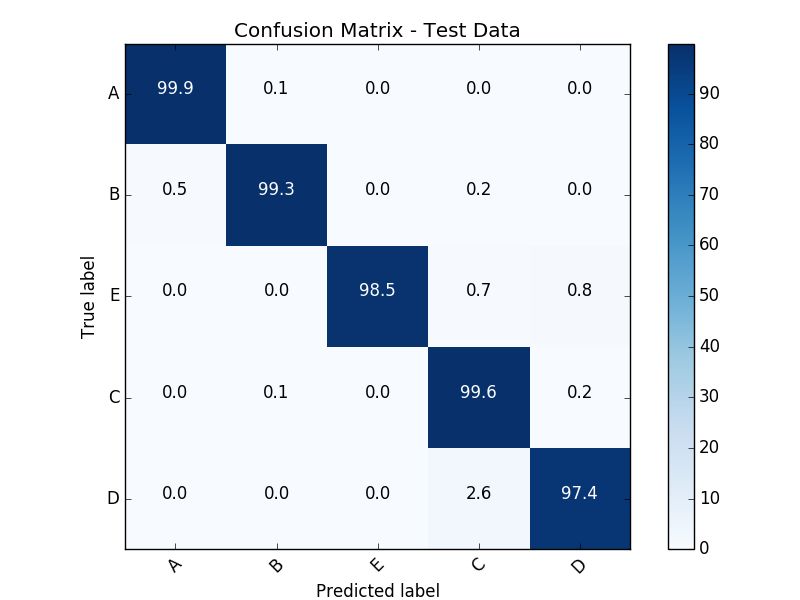

In [61]:
# plot confusion matrix
# code borrowed from scikit-learn.org
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import numpy as np
np.set_printoptions(precision=2)

display(plt.figure())
display(plot_confusion_matrix(cm_test, classes=model.stages[-3].labels, title="Confusion Matrix - Test Data", normalize=True))

##### Here we save the serialized Spark MLLib model to disk. This will be used later to operationalize the model with Azure ML service.

In [63]:
# import pickle

basePath = "/tmp/rf_model/"
dbutils.fs.rm(basePath, recurse=True)
# dbutils.fs.mkdirs(basePath + "model")
# dbutils.fs.mkdirs(basePath + "assembler")

model.write().overwrite().save(basePath + "rf_model.mllib")
# assembler.write().overwrite().save(basePath + "assembler")
# with open("/dbfs/" + basePath + "index_label.pkl", "wb") as out_file:
#   pickle.dump(index_model.labels, out_file)

In [64]:
dbutils.fs.ls(basePath + "rf_model.mllib")

Out[ 34 ]: 
[FileInfo(path='dbfs:/tmp/rf_model/rf_model.mllib/metadata/', name='metadata/', size=0),
 FileInfo(path='dbfs:/tmp/rf_model/rf_model.mllib/stages/', name='stages/', size=0)]